In [1]:
import pandas as pd
from matplotlib import pyplot as plt

/tmp/ipykernel_28577/3079533157.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Parte 1

In [2]:
# Leggi i dati della Protezione Civile, usando la data come indice di time-series
data_full = pd.read_csv("./../data/dpc-covid19-ita-regioni.csv", index_col="data", parse_dates=True)
data_full.head()

,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,...,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
data,,,,,,,,,,,,,,,,,,,,,
2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-24 18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Filtra i dati della Valle d'Aosta e sostituisci nuovi positivi negativi con 0
data_aosta_daily = data_full[data_full["denominazione_regione"] == "Valle d'Aosta"]
data_aosta_daily["nuovi_positivi"].map(lambda x: 0 if x < 0 else x)
data_aosta_daily.head()

,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,...,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
data,,,,,,,,,,,,,,,,,,,,,
2020-02-24 18:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-25 18:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26 18:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-27 18:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-28 18:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Calcola dei DataFrame riorganizzati per medie settimanali e mensili
data_aosta_weekly = data_aosta_daily.resample("W")
data_aosta_monthly = data_aosta_daily.resample("ME")

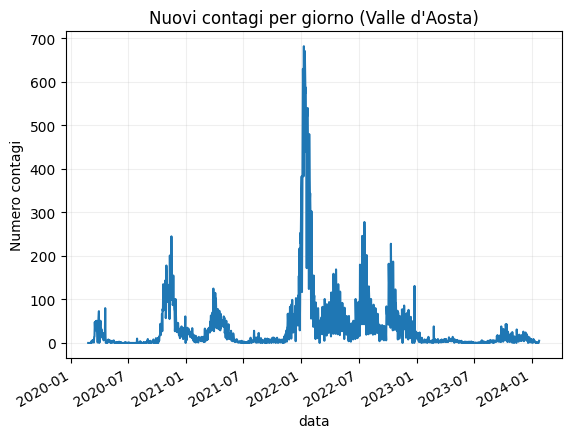

In [5]:
# Grafica il numero di contagi per giorno in Val d'Aosta
data_aosta_daily["nuovi_positivi"].plot(
    title="Nuovi contagi per giorno (Valle d'Aosta)",
    ylabel="Numero contagi",
)
plt.grid(alpha=0.2)

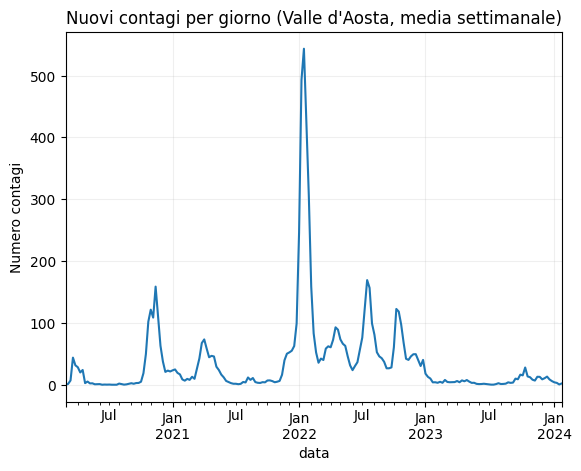

In [6]:
# I dati sono piuttosto rumorosi: conviene graficare la media settimanale
data_aosta_weekly["nuovi_positivi"].mean().plot(
    title="Nuovi contagi per giorno (Valle d'Aosta, media settimanale)",
    ylabel="Numero contagi",
)
plt.grid(alpha=0.2)

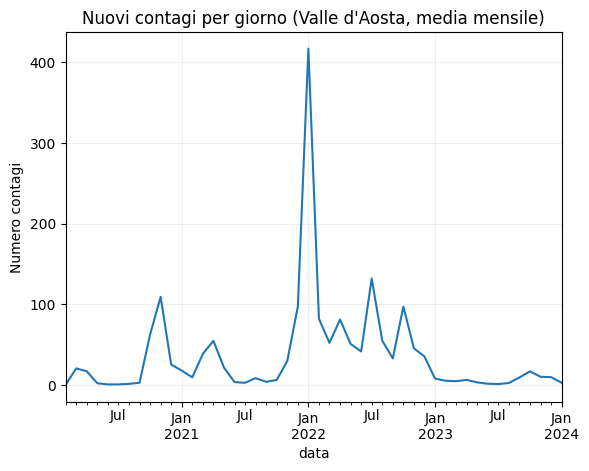

In [7]:
# La media mensile invece è troppo grezza
data_aosta_monthly["nuovi_positivi"].mean().plot(
    title="Nuovi contagi per giorno (Valle d'Aosta, media mensile)",
    ylabel="Numero contagi",
)
plt.grid(alpha=0.2)

# Parte 2

In [8]:
import numpy as np
from pandas import Timestamp, DatetimeIndex
from typing import Callable

In [9]:
def date_diff_to_int(t: Timestamp | DatetimeIndex, t_0: Timestamp):
    """
    Funzione di convenienza che trasforma date in un intero che denota la distanza in giorni
    Argomenti:
    t (Timestamp | DatetimeIndex): un Timestamp o un DatetimeIndex di pandas
    t_0 (Timestamp): il Timestamp rispetto al quale verrà calcolata la differenza
    Nota: la differenza non è assoluta ed è negativa se t < t_0
    """
    return (t - t_0).days


La funzione logistica è definita come
$$f(t) = \frac{N_{tot}}{1 + e^{-k(t-t_{0})}}$$

In [10]:
def logistic(t: float | Timestamp | DatetimeIndex, t_0: float | str | Timestamp, k: float, N_tot: float):
    """
    Calcola la funzione logisitica al tempo `t`
    Argomenti:
    t (int | Timestamp | DatetimeIndex): il tempo a cui calcolare la funzione. Può anche essere un
    Timestamp scalare o un DatetimeIndex di pandas. Nel caso di un DatetimeIndex, calcola la funzione per
    ogni valore dell'indice
    t_0 (int | str | Timestamp): il tempo d'inizio dell'evento. Se è la stringa "mid" e `t` è un array,
    si imposta automaticamente come il valore a metà dell'array (arrotondato per difetto)
    k (float): il tasso di propagazione
    N_tot (int): il numero totale di casi a fine evento
    """
    if t_0 == "mid" and hasattr(t, "__len__"):
        t_0 = t[len(t) // 2]
    if isinstance(t, (Timestamp, DatetimeIndex)) and isinstance(t_0, Timestamp):
        diff = date_diff_to_int(t, t_0)
    else:
        diff = t - t_0
    return N_tot / (1 + np.exp(-k * diff))

La funzione di Gompertz è definita come
$$f(t)=N_{tot}e^{-\log(N_{tot})\exp(-k(t-t_{0}))}$$

In [11]:
def gompertz(t: float, t_0: float, k: float, N_tot: float):
    """
    Calcola la funzione di Gompertz al tempo `t`
    Argomenti:
    t (int | Timestamp | DatetimeIndex): il tempo a cui calcolare la funzione. Può anche essere un
    Timestamp scalare o un DatetimeIndex di pandas. Nel caso di un DatetimeIndex, calcola la funzione per
    ogni valore dell'indice
    t_0 (int | Timestamp): il tempo d'inizio dell'evento
    k (float): il tasso di propagazione
    N_tot (int): il numero totale di casi a fine evento
    """
    if isinstance(t, (Timestamp, DatetimeIndex)) and isinstance(t_0, Timestamp):
        diff = date_diff_to_int(t, t_0)
    else:
        diff = t - t_0
    return N_tot * np.exp(-np.log(N_tot) * np.exp(-k * diff))

In [12]:
def contagi_giornalieri(func: Callable, day: int | Timestamp | DatetimeIndex, **kwargs):
    """
    Conta i contagi giornalieri predetti dalla funzione `func` tra il giorno `day` e quello successivo
    Argomenti:
    func (Callable): La funzione da campionare
    day (int | DatetimeIndex | Timestamp): Il giorno da considerare, come numero di giorni dall'inizio della pandemia
    kwargs: Gli argomenti aggiuntivi da passare alla funzione `func`
    """
    next_day = day + pd.Timedelta(days=+1) if isinstance(day, (DatetimeIndex, Timestamp)) else day + 1
    return abs(func(next_day, **kwargs) - func(day, **kwargs))

In [13]:
x = np.linspace(-15, 15, 1000)

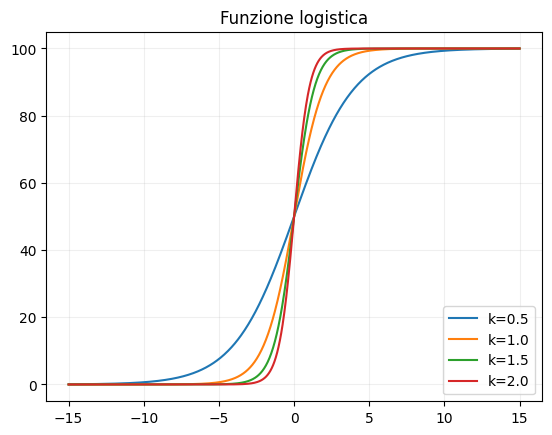

In [14]:
# Alcuni test per vedere se la funzione logistica è corretta
for k in [0.5, 1.0, 1.5, 2.0]:
    plt.plot(x, logistic(x, 0, k, 100), label=f"k={k}")
plt.legend(loc="lower right")
plt.title("Funzione logistica")
plt.grid(alpha=0.2)

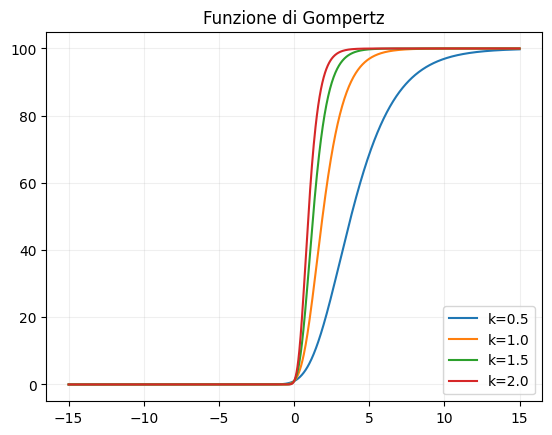

In [15]:
# Alcuni test per vedere se la funzione di Gompertz è corretta
for k in [0.5, 1.0, 1.5, 2.0]:
    plt.plot(x, gompertz(x, 0, k, 100), label=f"k={k}")
plt.legend(loc="lower right")
plt.title("Funzione di Gompertz")
plt.grid(alpha=0.2)


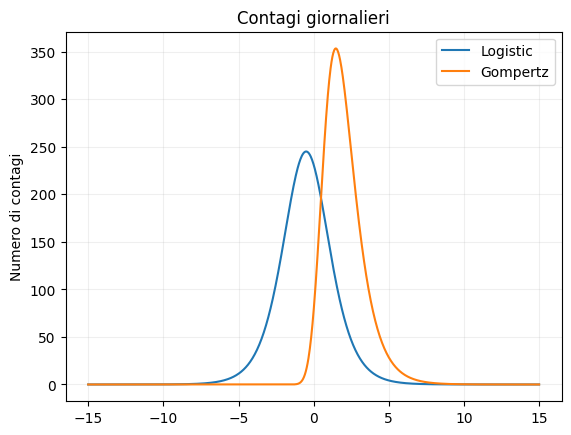

In [16]:
# Osserviamo la variazione giornaliera delle due funzioni (con k=1)
conts_l = contagi_giornalieri(logistic, x, k=1, N_tot=1000, t_0=0)
conts_g = contagi_giornalieri(gompertz, x, k=1, N_tot=1000, t_0=0)
plt.plot(x, conts_l, label="Logistic")
plt.plot(x, conts_g, label="Gompertz")
plt.title("Contagi giornalieri")
plt.ylabel("Numero di contagi")
plt.legend()
plt.grid(alpha=0.2)

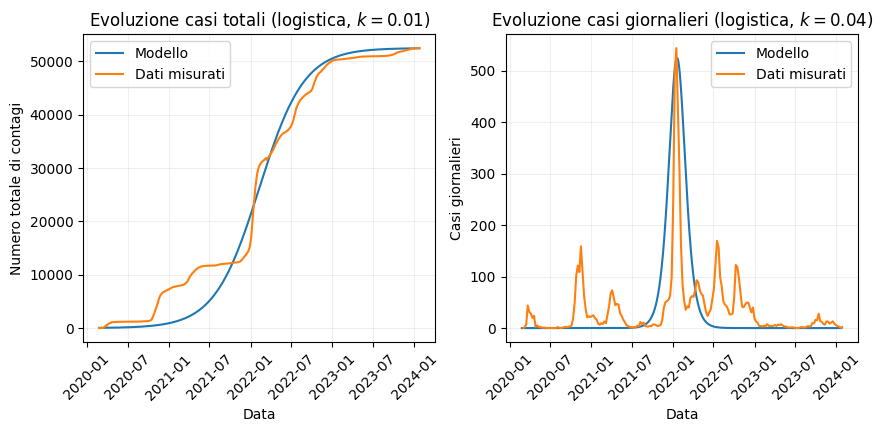

In [17]:
# Un primo tentativo completamente manuale al fittare la logistica ai dati misurati
d1 = data_aosta_daily.index
midpoint = d1[len(d1) // 2]
max_contagions = data_aosta_daily["totale_casi"].max()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].plot(d1, logistic(d1, "mid", 0.01, max_contagions), label="Modello")
axes[0].plot(data_aosta_daily["totale_casi"], label="Dati misurati")
axes[0].set_title("Evoluzione casi totali (logistica, $k=0.01$)")
axes[0].set_xlabel("Data")
axes[0].tick_params("x", rotation=45)
axes[0].set_ylabel("Numero totale di contagi")
axes[0].grid(alpha=0.2)
axes[0].legend()

axes[1].plot(
    d1,
    contagi_giornalieri(
        logistic,
        d1,
        t_0=midpoint + pd.Timedelta(days=-20),
        k=0.04,
        N_tot=max_contagions,
    ),
    label="Modello",
)
axes[1].plot(data_aosta_weekly["nuovi_positivi"].mean(), label="Dati misurati")
axes[1].set_title("Evoluzione casi giornalieri (logistica, $k=0.04$)")
axes[1].set_xlabel("Data")
axes[1].tick_params("x", rotation=45)
axes[1].set_ylabel("Casi giornalieri")
axes[1].grid(alpha=0.2)
axes[1].legend()

Come ci si può aspettare, una curva semplice come quella logistica fatica a dare una buona approssimazione dell'andamento della pandemia durante tutto il suo corso. In particolare, la pandemia si divide chiaramente in periodi di contagi molto frequenti (ondate) e periodi "refrattari" entro il quale i contagi sono più sporadici. Ciò rende la curva dei casi giornalieri molto "accidentata", con diversi picchi e valli. Come si può vedere dal grafico di destra, la distribuzione giornaliera ottenuta dalla logistica ha un singolo picco, il che la rende inadatta a descrivere il comportamento di tutte le ondate in un singolo modello. D'altro canto, la crescita dei casi totali è approssimata con precisione molto migliore: l'unica imprecisione notevole è nel primo terzo della pandemia, dove si nota una evidente sottostima.

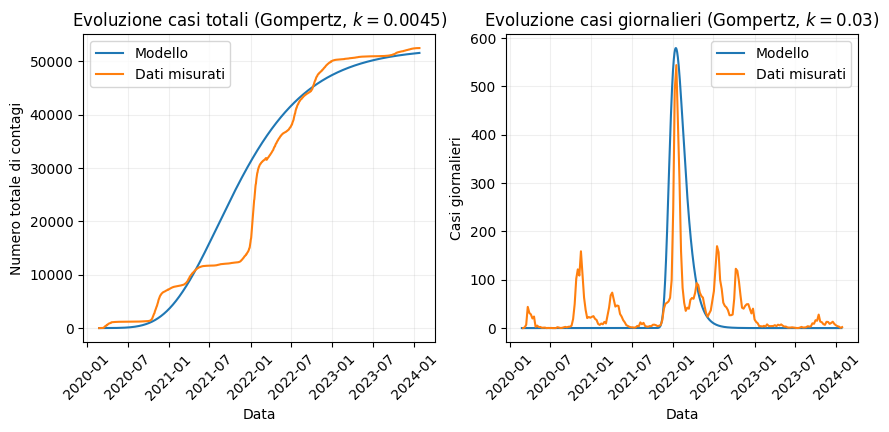

In [18]:
# Un primo tentativo completamente manuale al fittare la funzione di Gompertz ai dati misurati
d0 = data_aosta_daily.index[0]
d1 = data_aosta_daily.index
midpoint = d1[len(d1) // 2]
max_contagions = data_aosta_daily["totale_casi"].max()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
max_contagions = data_aosta_daily["totale_casi"].max()
axes[0].plot(d1, gompertz(d1, d0, 0.0045, max_contagions), label="Modello")
axes[0].plot(data_aosta_daily["totale_casi"], label="Dati misurati")
axes[0].set_title("Evoluzione casi totali (Gompertz, $k=0.0045$)")
axes[0].set_xlabel("Data")
axes[0].tick_params("x", rotation=45)
axes[0].set_ylabel("Numero totale di contagi")
axes[0].grid(alpha=0.2)
axes[0].legend()

axes[1].plot(
    d1,
    contagi_giornalieri(
        gompertz,
        d1,
        t_0=midpoint + pd.Timedelta(days=-105),
        k=0.03,
        N_tot=max_contagions,
    ),
    label="Modello",
)
axes[1].plot(data_aosta_weekly["nuovi_positivi"].mean(), label="Dati misurati")
axes[1].set_title("Evoluzione casi giornalieri (Gompertz, $k=0.03$)")
axes[1].set_xlabel("Data")
axes[1].tick_params("x", rotation=45)
axes[1].set_ylabel("Casi giornalieri")
axes[1].grid(alpha=0.2)
axes[1].legend()

La funzione di Gompertz presenta caratteristiche simili a quelle della funzione logistica. Il singolo picco nei casi giornalieri rende impossibile avere una buona approssimazione delle ondate sebbene l'approssimazione dei casi totali sia tollerabile. È interessante notare come la funzione di Gompertz tenda a sovrastimare i casi totali per la maggior parte della pandemia, a differenza della logistica che tende a sottostimare il primo periodo.

# Parte 3

In [19]:
from scipy.stats import poisson
from scipy.optimize import minimize
import emcee
import corner

In [20]:
# Filtriamo i dati per tenere solo quelli dei primi 35 giorni
data_aosta_daily_early = data_aosta_daily[data_aosta_daily.index <= Timestamp(year=2020, month=3, day=30)]
data_aosta_daily_early.shape

(35, 29)

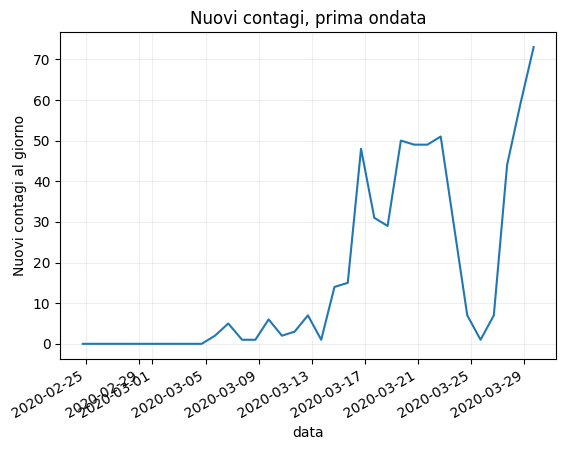

In [21]:
# Visualizziamo i dati per vedere su cosa stiamo lavorando
data_aosta_daily_early["nuovi_positivi"].plot(
    title="Nuovi contagi, prima ondata",
    ylabel="Nuovi contagi al giorno"
)
plt.grid(alpha=0.2)

## Modello logistico

Qui cerchiamo di descrivere e modellare l'evoluzione dei contagi giornalieri utilizzando una curva logistica.
Assumiamo che i parametri di tale curva siano distribuiti con una distribuzione poissoniana
$$\text{Pois}(k)=\frac{\lambda^{k}e^{-\lambda}}{k!}$$
dove $\lambda$ è il valore di aspettazione e $k$ è il numero di eventi che si vuole accadano. La forma logaritmica (nel senso del logaritmo naturale) è
$$\log\text{Pois}(k)=\log(\lambda^{k})+\log(e^{-\lambda})-\log(k!)=k\log(\lambda)-\lambda-\sum\limits_{i=2}^{k}\log(i)$$

In [22]:
# Definiamo la struttura statistica per effettuare la ricerca dei parametri del modello
# Si usa la forma logaritmica per motivi numerici: la distribuzione di Poisson assunta come
# distribuzione dei parametri del modello richiede il calcolo di un esponenziale e di un
# fattoriale, entrambi numeri che aumentano enormemente e causano floating point overflow
# piuttosto rapidamente, anche a 64bit. L'uso della forma logaritmica permette di limitare
# l'ordine di grandezza dei numeri per evitare bug difficili da rintracciare.

# Il prior è piuttosto scarno: sappiamo che la data t_0 non ha senso essere prima del giorno 0,
# che k non può essere negativo per definizione e che il numero totale di contagi N_tot ovviamente
# non può essere negativo
def log_prior(t_0: float, k: float, N_tot: int):
    if t_0 < 0 or k < 0 or N_tot < 0:
        return -np.inf
    return 0.0

# La likelihood è data da una distribuzione poissoniana, il cui numero di eventi misurati lambda è
# dato dalla funzione logistica, o meglio dai contagi giornalieri misurati tramite la logistica
def log_likelihood(t_0: float, k: float, N_tot: int, day_from_start: int, measured_cases: int):
    lam = contagi_giornalieri(logistic, day_from_start, t_0=t_0, k=k, N_tot=N_tot)
    k_pois = measured_cases
    logfac = [np.sum(np.log(np.arange(2, k_i + 1))) for k_i in k_pois]
    return np.nansum(k_pois*np.log(lam) - lam - logfac)

# Il (log)posterior è semplicemente la somma di (log)prior e (log)likelihood
def log_posterior(params: list, day_from_start: int, measured_cases: int):
    t_0, k, N_tot = params
    prior = log_prior(t_0, k, N_tot)
    if not np.isfinite(prior):
        return -np.inf
    llh = log_likelihood(t_0, k, N_tot, day_from_start, measured_cases)
    return prior + llh

In [23]:
# Controllo per garantire che la forma logaritmica della poissoniana sia effettivamente corretta
np.isclose(12 * np.log(8) - 8 - np.sum(np.log(np.arange(2, 13))), np.log(poisson(8).pmf(12)), atol=1e-6)

True

In [24]:
# Impostiamo il seme RNG per rendere i calcoli riproducibili
np.random.seed(1234)

In [25]:
# Cerchiamo il minimo della funzione posterior per migliorare il punto di partenza dell'algoritmo emcee
starting_point = np.array([0, 0.1, 1000])
min_result = minimize(
    lambda *args: -log_posterior(*args),
    starting_point,
    args=(
        np.arange(0, 35), # Giorni dall'inizio della pandemia
        data_aosta_daily_early["nuovi_positivi"],
    ),
)
min_params = min_result.x
min_params

/run/media/dawnstar/vault/vault-home/Software/Python/analisi-covid-trmd/venv/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


array([2.98563626e+01, 2.28548804e-01, 7.65336619e+02])

In [26]:
# L'algoritmo emcee vero e proprio, calcolato sui dati dei nuovi contagi nei prima 35 giorni
sampler = emcee.EnsembleSampler(32, 3, log_posterior, args=(np.arange(0, 35), data_aosta_daily_early["nuovi_positivi"]))
sampler.run_mcmc(min_params + 1e-2 * np.random.rand(32, 3), 4000, progress=True)

100%|█████████████████████████████████████████████████████████████████████| 4000/4000 [00:43<00:00, 91.76it/s]


State([[3.02336560e+01 2.20092095e-01 7.45596036e+02]
 [2.96169438e+01 2.19364586e-01 7.37141383e+02]
 [3.01939105e+01 2.29943271e-01 7.49600387e+02]
 [2.96160027e+01 2.28322793e-01 7.85306298e+02]
 [3.00518983e+01 2.30672969e-01 7.48457810e+02]
 [2.93833333e+01 2.22770439e-01 7.43966578e+02]
 [2.97519066e+01 2.21494201e-01 8.16548207e+02]
 [2.89843743e+01 2.61218704e-01 7.50607284e+02]
 [2.91236844e+01 2.30788406e-01 6.99723877e+02]
 [2.84611929e+01 2.42851696e-01 6.76611000e+02]
 [3.08979239e+01 2.18183283e-01 8.37135070e+02]
 [2.93226748e+01 2.20763684e-01 7.34234254e+02]
 [3.03095286e+01 2.17413282e-01 8.11212743e+02]
 [3.06044198e+01 2.26969061e-01 8.07702677e+02]
 [3.07583839e+01 2.23714426e-01 7.92825531e+02]
 [3.05855214e+01 2.18201646e-01 8.70794830e+02]
 [2.89953680e+01 2.29506958e-01 7.24625932e+02]
 [3.00837998e+01 2.02130944e-01 8.52998295e+02]
 [3.04496839e+01 2.25436271e-01 8.18561019e+02]
 [2.97020084e+01 2.23526844e-01 7.76532921e+02]
 [3.08923862e+01 2.06615654e-01 7.

Text(0.5, 0, 'Numero di passi')

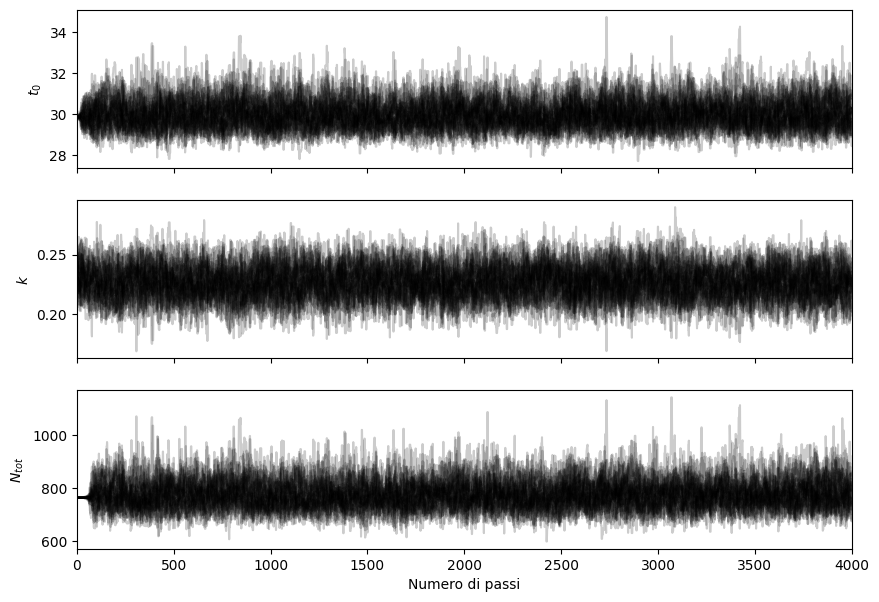

In [27]:
# Grafichiamo i risultati della catena di Monte Carlo
samples = sampler.get_chain()

dims = 3
fig, axes = plt.subplots(dims, figsize=(10, 7), sharex=True)
labels = ["$t_{0}$", "$k$", "$N_{tot}$"]
for i in range(dims):
    axes[i].plot(samples[:, :, i], "k", alpha=0.2)
    axes[i].set_xlim(0, len(samples))
    axes[i].set_ylabel(labels[i])

axes[-1].set_xlabel("Numero di passi")

L'algoritmo di minimizzazione ha correttamente portato i parametri iniziali ad un valore simile a quello più affidabile, come si può notare dal fatto che le oscillazioni accadono tutte in un intervallo centrato nel punto di partenza.

In [28]:
# Controlliamo che il tempo di autocorrelazione sia sufficientemente alto
# (ossia che emcee non dia un errore)
tau = sampler.get_autocorr_time()
tau

array([37.30947285, 37.73241539, 38.61785122])

In [29]:
# Prendiamo i valori della catena, scartando i primi 100
flat_samples = sampler.get_chain(discard=100, flat=True)
flat_samples.shape

(124800, 3)

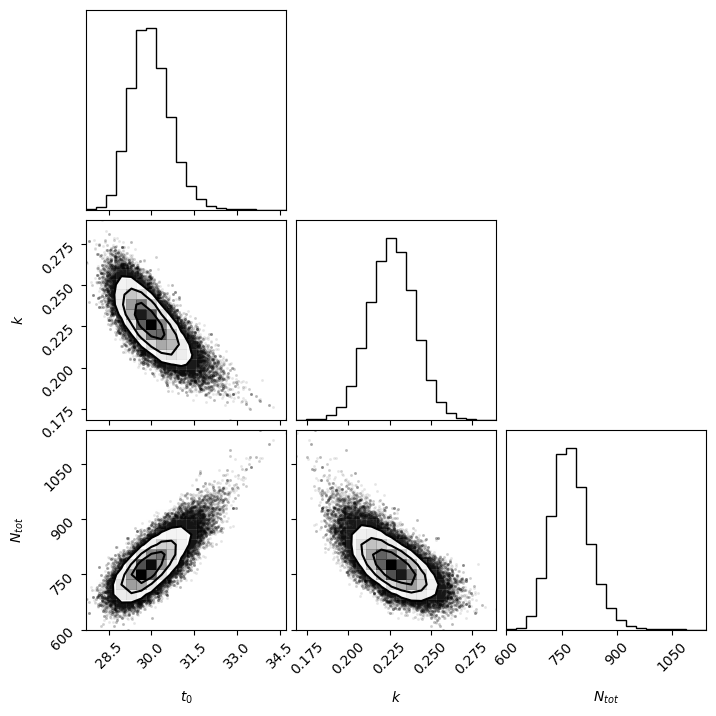

In [30]:
# Grafichiamo le combinazioni di parametri in modo da osservare le loro distribuzioni
# e notare possibili correlazioni fra di essi
fig = corner.corner(flat_samples, labels=labels)

Qui vediamo le distribuzioni dei tre parametri $t_{0}$, $k$ e $N_{tot}$, assieme alle loro covarianze. Si osserva immediatamente dalla distribuzione di $N_{tot}$ o da quella di $t_{0}$ la forma di una poissoniana, che è precisamente ciò che ci si aspetta da un'inferenza bayesiana con parametri distribuiti con tale distribuzione. Più interessanti sono le proiezioni delle distribuzioni congiunte, dove si nota un'evidente e forte covarianza tra i termini: $N_{tot}$ e $t_{0}$ sono fortemente correlati, mentre $N_{tot}$ e $k$, e $t_{0}$ e $k$ sono fortemente anticorrelati.

Le correlazioni tra i parametri sono interpretabili nei seguenti modi:
1. $t_{0}$ e $N_{tot}$ sono positivamente correlati. Dal punto di vista strettamente matematico, $t_{0}$ rappresenta il centro (di simmetria) della funzione logistica, oltre che l'unico punto di flesso. Interpretandolo in chiave epidemica, esso è il momento a metà dell'epidemia (o di un'ondata, in questo caso), quindi contiene anche informazioni sulla durata di essa, che si può trovare raddoppiandolo (questo verrà confermato nei prossimi grafici). Se $t_{0}$ è grande, allora ciò implica che l'ondata durerà più a lungo ed è dunque ragionevole supporre che un'ondata lunga implichi un maggior numero di contagi avvenuti nella sua durata, quindi $N_{tot}$ più alto.
2. $k$ e $t_{0}$ sono negativamente correlati. Matematicamente, la $k$ è la pendenza della curva. Più alta è, più ripida è la curva. In termini di contagi, ciò significa un grande picco di casi in un tempo estremamente ridotto, che però rallenta quasi immediatamente per poi quasi fermarsi. Considerato che una persona infetta diventa immune a ulteriori infezioni per un certo tempo, è ragionevole assumere che un'ondata con grande infettività terminerebbe in poco tempo, in quanto il numero di persone contagiabili diminuisce tanto velocemente quanto aumenta il numero di contagi.
3. $k$ e $N_{tot}$ sono negativamente correlate. Questa connessione è più ardua da formalizzare: intuitivamente, una grande $k$, la "infettività", implica un numero più alto di infetti totali, dato che il virus si espande più rapidamente. Il modello, tuttavia, suggerisce che il caso opposto sia quello più affidabile. Una spiegazione molto grezza può essere la seguente: si prenda come metafora una candela. La fiamma è il virus e l'ossigeno che permette la combustione sono gli individui infettabili. Una fiamma più forte ($k$ alto) implica l'ossigeno venga consumato più in fretta (più contagi in poco tempo, vedi punto 2). In mancanza di misure restrittive, l'ossigeno è presente in quantità enormi e la candela è libera di bruciarne quanto vuole (contagi di massa, storicamente la norma per le epidemie come la peste o l'influenza spagnola). Tuttavia al COVID si è risposto con misure restrittive, il lockdown. Si pensi ad un bicchiere che viene poggiato attorno alla candela, racchiudendola. Ciò limita l'ossigeno a cui ha accesso (il numero di persone non immuni) e dunque tenderà a spegnersi. La velocità con cui si spegne dipende da quanto forte brucia (la $k$, di nuovo punto 2), ma è anche limitata nel numero di contagi totali che può causare e dunque $N_{tot}$. Una malattia meno pericolosa e virulenta ($k$ basso) non richiede misure così drastiche, quindi sebbene infetti meno individui nel breve termine, la mancanza di restrizioni le permetterebbe di diffondersi molto di più nel lungo termine ($t_{0}$ alto) e con più contagi totali ($N_{tot}$ alto). Va reso chiaro che questa interpretazione è intenzionalmente vaga e qualitativa. La correlazione in esame racchiude molta informazione che in questa analisi non è espressa e andrebbe utilizzato un modello che tiene conto di parametri sociali e di isolamento per essere spiegata in modo affidabile.

In [31]:
# Troviamo i parametri più affidabili
t_0_best_fit, k_best_fit, N_tot_best_fit = np.percentile(flat_samples, 50, axis=0)
t_0_best_fit, k_best_fit, N_tot_best_fit

(29.941337641156416, 0.2269167715804173, 773.0002825953479)

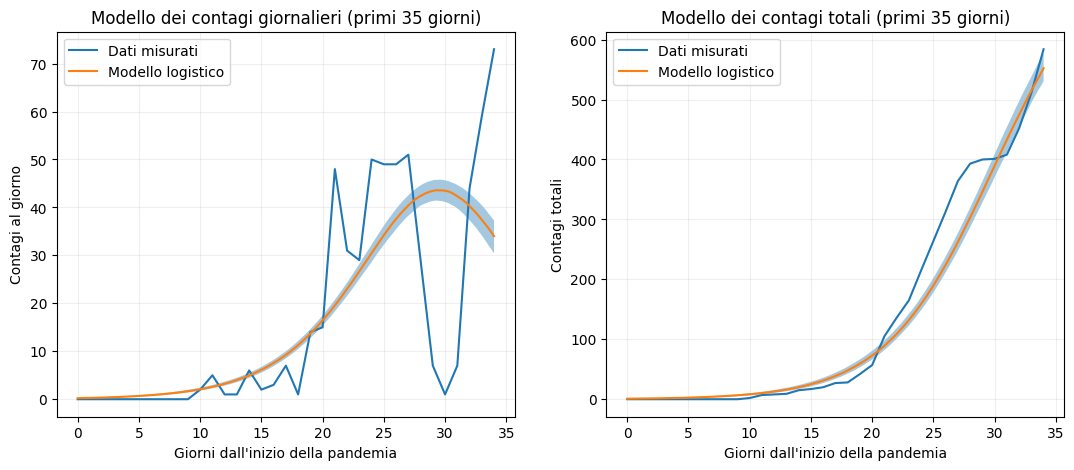

In [32]:
# Ora creiamo un grafico per vedere il risultato del modello in sè.
# Prendiamo un campione uniforme di 1000 elementi (parametri stimati) dalla catena per evitare
# di dover calcolare centinaia di migliaia di valori per ottenere un grafico.
# Calcoliamo poi i valori della logistica con quei parametri.
N_samples = 1000
x_arr = np.linspace(0, 34, 2000)
y_arr = np.zeros((2000, N_samples))
for i in range(N_samples):
    idx = np.random.randint(flat_samples.shape[0])
    est_t_0, est_k, est_N_tot = flat_samples[idx, :]
    y_arr[:, i] = contagi_giornalieri(logistic, x_arr, t_0=est_t_0, k=est_k, N_tot=est_N_tot)

# Prendiamo il modello migliore (50° percentile) e quelli ad una "deviazione standard"
# dal 50° percentile della distribuzione (16° e 84° percentili)
y_arr_best_fit = np.percentile(y_arr, 50, axis=1)
y_arr_lower_estimate = np.percentile(y_arr, 16, axis=1)
y_arr_upper_estimate = np.percentile(y_arr, 84, axis=1)

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

axes[0].plot(np.arange(0, 35), data_aosta_daily_early["nuovi_positivi"], label="Dati misurati")
axes[0].plot(x_arr, y_arr_best_fit, label="Modello logistico")
axes[0].fill_between(x_arr, y_arr_lower_estimate, y_arr_upper_estimate, alpha=0.4)
axes[0].set_title("Modello dei contagi giornalieri (primi 35 giorni)")
axes[0].set_xlabel("Giorni dall'inizio della pandemia")
axes[0].set_ylabel("Contagi al giorno")
axes[0].grid(alpha=0.2)
axes[0].legend()

# e controlliamo anche l'andamento nei casi totali, non solo quelli giornalieri
for i in range(N_samples):
    idx = np.random.randint(flat_samples.shape[0])
    est_t_0, est_k, est_N_tot = flat_samples[idx, :]
    y_arr[:, i] = logistic(x_arr, t_0=est_t_0, k=est_k, N_tot=est_N_tot)

y_arr_best_fit = np.percentile(y_arr, 50, axis=1)
y_arr_lower_estimate = np.percentile(y_arr, 16, axis=1)
y_arr_upper_estimate = np.percentile(y_arr, 84, axis=1)

axes[1].plot(np.arange(0, 35), data_aosta_daily_early["totale_casi"], label="Dati misurati")
axes[1].plot(x_arr, y_arr_best_fit, label="Modello logistico")
axes[1].fill_between(x_arr, y_arr_lower_estimate, y_arr_upper_estimate, alpha=0.4)
axes[1].set_title("Modello dei contagi totali (primi 35 giorni)")
axes[1].set_xlabel("Giorni dall'inizio della pandemia")
axes[1].set_ylabel("Contagi totali")
axes[1].grid(alpha=0.2)
axes[1].legend()

Qui si può vedere come il modello si paragona ai dati sperimentali.
1. Anzitutto vediamo come il modello fatica a rappresentare la grande variabilità dei contagi giornalieri, che possono variare da diverse decine a meno di dieci in appena una giornata. Considerando che l'unico dato utilizzato per il fit del modello sono i contagi giornalieri, trascurando i numerosi fattori sociali che possono portare ad un aumento o diminuzione di contagi, il risultato è soddisfacente. Il modello correttamente pone il picco di contagi verso l'estremo destro dell'intervallo, predicendo che i contagi giornalieri rimarranno alti ancora per un certo periodo.
2. Il fit dei contagi totali è invece molto più preciso. Tra i 10 e i 20 giorni sovrastima leggermente, mentre tra i 20 e i 30 presenta una sottostima non trascurabile, ma l'andamento è complessivamente corretto ed è un buon approssimante.
3. Il margine di incertezza sui parametri, raffigurato come la banda blu attorno al modello, è relativamente stretta, denotando che l'algoritmo emcee ha una buona certezza sui parametri stimati. Questo è specialmente vero nei contagi totali.

In [33]:
# Espandiamo l'intervallo di dati ai primi 100 giorni
data_aosta_daily_100 = data_aosta_daily[data_aosta_daily.index < data_aosta_daily.index[0] + pd.Timedelta(days=+99)]
data_aosta_daily_100.shape

(100, 29)

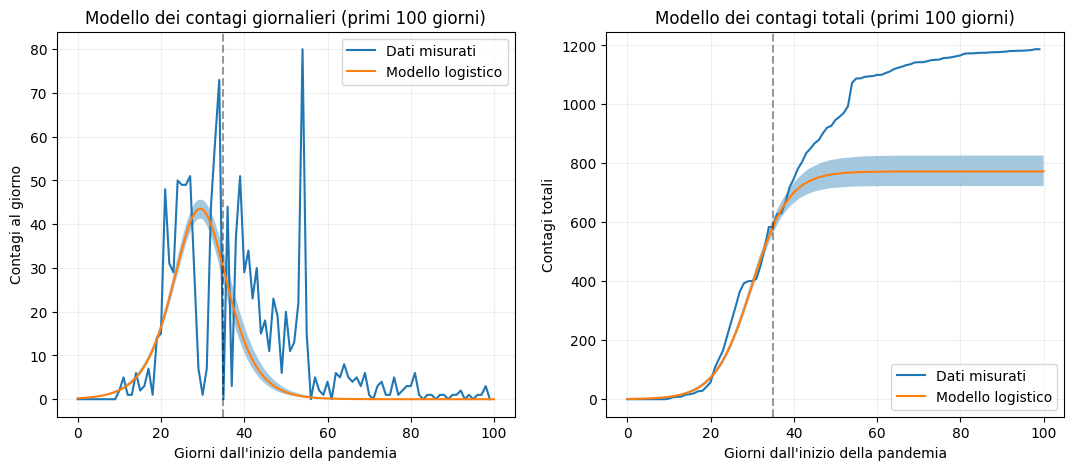

In [34]:
# Vediamo se il modello predice con buona precisione oltre l'intervallo di "addestramento"
x_arr = np.linspace(0, 100, 2000)
y_arr = np.zeros((2000, N_samples))
for i in range(N_samples):
    idx = np.random.randint(flat_samples.shape[0])
    est_t_0, est_k, est_N_tot = flat_samples[idx, :]
    y_arr[:, i] = contagi_giornalieri(logistic, x_arr, t_0=est_t_0, k=est_k, N_tot=est_N_tot)

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

axes[0].plot(np.arange(0, 100), data_aosta_daily_100["nuovi_positivi"], label="Dati misurati")
axes[0].plot(x_arr, np.percentile(y_arr, 50, axis=1), label="Modello logistico")
axes[0].fill_between(x_arr, np.percentile(y_arr, 16, axis=1), np.percentile(y_arr, 84, axis=1), alpha=0.4)
axes[0].axvline(35, linestyle="--", color="black", alpha=0.4)
axes[0].set_title("Modello dei contagi giornalieri (primi 100 giorni)")
axes[0].set_xlabel("Giorni dall'inizio della pandemia")
axes[0].set_ylabel("Contagi al giorno")
axes[0].grid(alpha=0.2)
axes[0].legend()

# e controlliamo anche l'andamento nei casi totali, non solo quelli giornalieri
for i in range(N_samples):
    idx = np.random.randint(flat_samples.shape[0])
    est_t_0, est_k, est_N_tot = flat_samples[idx, :]
    y_arr[:, i] = logistic(x_arr, t_0=est_t_0, k=est_k, N_tot=est_N_tot)

y_arr_best_fit = np.percentile(y_arr, 50, axis=1)
y_arr_lower_estimate = np.percentile(y_arr, 16, axis=1)
y_arr_upper_estimate = np.percentile(y_arr, 84, axis=1)

axes[1].plot(np.arange(0, 100), data_aosta_daily_100["totale_casi"], label="Dati misurati")
axes[1].plot(x_arr, y_arr_best_fit, label="Modello logistico")
axes[1].fill_between(x_arr, y_arr_lower_estimate, y_arr_upper_estimate, alpha=0.4)
axes[1].axvline(35, linestyle="--", color="black", alpha=0.4)
axes[1].set_title("Modello dei contagi totali (primi 100 giorni)")
axes[1].set_xlabel("Giorni dall'inizio della pandemia")
axes[1].set_ylabel("Contagi totali")
axes[1].grid(alpha=0.2)
axes[1].legend()

Qui si osservano l'affidabilità delle predizioni del modello logistico.
1. Salta all'occhio la grande ed evidente sottostima che il modello predice immediatamente dopo il periodo su cui è stato compiuto il fit, sia nel caso giornaliero che in quello cumulativo. In quello giornaliero il modello anticipa il quasi azzeramento dei contagi giornalieri di un periodo considerevole, quasi due settimane rispetto al giorno giusto (approssimativamente il 60° giorno). L'errore è ancora più marcato nei contagi totali, dove la curva si stabilizza a oltre 400 contagi totali in meno di quanto si è osservato.
2. Si dia attenzione al parametro $t_{0}$. Nella discussione sulle correlazioni tra i parametri si era fatto cenno a come $t_{0}$ rappresentasse il tempo mediano dell'epidemia o ondata in esame, e che il suo doppio $2t_{0}$ fosse la data in cui i contagi raggiungessero un minimo stabile. Per questo modello $t_{0}\approx30$ giorni, dunque la predizione è che l'ondata termini a 60 giorni dal suo inizio. I dati misurati danno credibilità a questa ipotesi: attorno ai 60 giorni si nota che i contagi giornalieri si sono abbassati ad un minimo dall'inizio dell'ondata e che rimangono stabilmente bassi\*. Questo suggerisce che la parametrizzazione usata sia complessivamente buona e che i valori trovati siano affidabili. Tuttavia, la curva utilizzata, la logistica, sia inadatta a rappresentare questa genere di evoluzione nel tempo. Per questa ragione, è proposto anche un modello basato sulla funzione di Gompertz.


\*È discutibile se porre il termine dell'ondata al 60° giorno sia un'affermazione ragionevole o un caso di bias di conferma. È altrettanto ragionevole dichiarare che la fine dell'ondata accada attorno all'85° giorno, dove i casi non solo sono stabilmente bassi, ma anche tendenti allo 0. Tuttavia, credo che aggiungere la clausola di "tendenza allo 0 dei contagi" alla definizione di "termine di ondata" sia un'eccessiva restrizione, dato che le ondate che si osservano nella parte centrale della pandemia non raggiungono mai un valore prossimo allo zero. Una definizione del genere renderebbe impossibile isolare le varie ondate centrali, che sono chiaramente visibili dai dati. Naturalmente, questa discussione a senso solo nell'ipotesi che l'ondata sia definita come un "picco di contagi giornalieri in un periodo circoscritto e relativamente breve di tempo".

## Modello di Gompertz

In [35]:
# Ridefiniamo likelihood in funzione della curva di Gompertz

# Il prior è uguale a quello della funzione logistica
def log_prior(t_0: float, k: float, N_tot: int):
    if t_0 < 0:
        return -np.inf
    if k < 0:
        return -np.inf
    if N_tot < 0:
        return -np.inf
    return 0.0

# Nella likelihood cambia solo la funzione che usiamo per trovare i contagi giornalieri
def log_likelihood(t_0: float, k: float, N_tot: int, day_from_start: int, measured_cases: int):
    lam = contagi_giornalieri(gompertz, day_from_start, t_0=t_0, k=k, N_tot=N_tot)
    k_pois = measured_cases
    logfac = [np.sum(np.log(np.arange(2, k_i + 1))) for k_i in k_pois]
    return np.nansum(k_pois*np.log(lam) - lam - logfac)

# Il (log)posterior è semplicemente la somma di (log)prior e (log)likelihood
def log_posterior(params: list, day_from_start: int, measured_cases: int):
    t_0, k, N_tot = params
    prior = log_prior(t_0, k, N_tot)
    if not np.isfinite(prior):
        return -np.inf
    llh = log_likelihood(t_0, k, N_tot, day_from_start, measured_cases)
    return prior + llh

In [36]:
# Cerchiamo il minimo della funzione posterior per migliorare il punto di partenza dell'algoritmo emcee
starting_point = np.array([0, 0.1, 1000])
min_result = minimize(
    lambda *args: -log_posterior(*args),
    starting_point,
    args=(
        np.arange(0, 35), # Giorni dall'inizio della pandemia
        data_aosta_daily_early["nuovi_positivi"],
    ),
)
min_params = min_result.x
min_params

/run/media/dawnstar/vault/vault-home/Software/Python/analisi-covid-trmd/venv/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


array([1.07001656e+01, 9.65473155e-02, 1.14634956e+03])

In [37]:
# L'algoritmo emcee vero e proprio, calcolato sui dati dei prima 35 giorni
sampler = emcee.EnsembleSampler(32, 3, log_posterior, args=(np.arange(0, 35), data_aosta_daily_early["nuovi_positivi"]))
sampler.run_mcmc(min_params + 1e-2 * np.random.rand(32, 3), 4000, progress=True)

100%|█████████████████████████████████████████████████████████████████████| 4000/4000 [00:42<00:00, 93.13it/s]


State([[9.45405285e+00 8.38276395e-02 1.27900344e+03]
 [9.99268626e+00 9.20965281e-02 1.17297717e+03]
 [1.17717319e+01 1.06137438e-01 1.02423231e+03]
 [1.14783612e+01 1.00871522e-01 1.10249434e+03]
 [1.01035314e+01 9.03189262e-02 1.14965468e+03]
 [9.60654236e+00 7.92947923e-02 1.67476796e+03]
 [9.36321390e+00 8.88708371e-02 1.20117357e+03]
 [1.08360158e+01 9.58524378e-02 1.09685860e+03]
 [9.32992220e+00 8.28011240e-02 1.47101648e+03]
 [9.74400221e+00 9.09236211e-02 1.22408238e+03]
 [1.10598689e+01 1.02609979e-01 9.99849299e+02]
 [1.03703415e+01 9.83496772e-02 1.22806257e+03]
 [9.82579149e+00 7.79171547e-02 1.76359776e+03]
 [1.09045909e+01 9.04663413e-02 1.35904770e+03]
 [1.02998134e+01 9.06564107e-02 1.24594911e+03]
 [1.06762909e+01 9.21231965e-02 1.19758116e+03]
 [1.16255173e+01 1.08490145e-01 1.13065707e+03]
 [9.85778249e+00 8.70357782e-02 1.42254068e+03]
 [9.99311636e+00 8.93436619e-02 1.28507646e+03]
 [9.70009799e+00 9.19632462e-02 1.17769354e+03]
 [1.06449793e+01 9.51046298e-02 1.

Text(0.5, 0, 'Numero di passi')

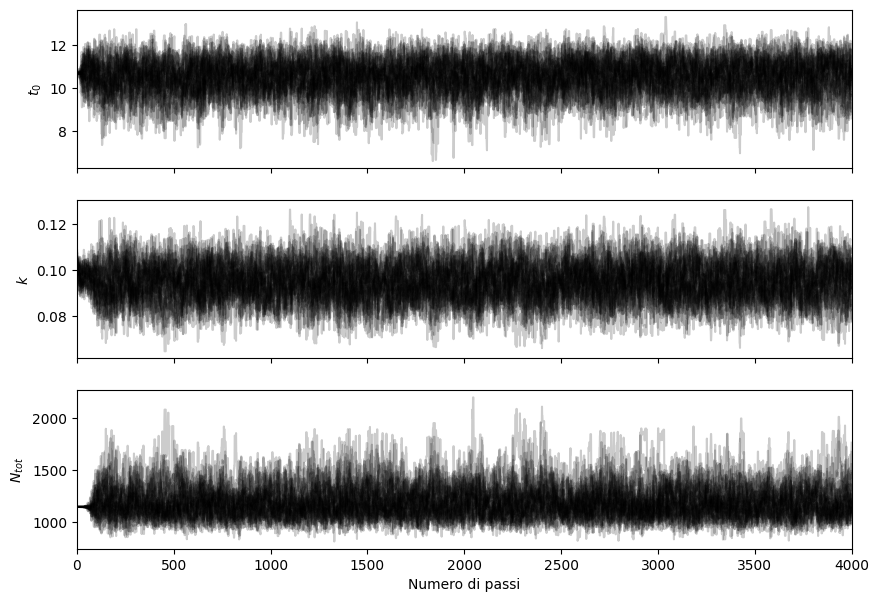

In [38]:
# Grafichiamo i risultati della catena di Monte Carlo
samples = sampler.get_chain()

dims = 3
fig, axes = plt.subplots(dims, figsize=(10, 7), sharex=True)
labels = ["$t_{0}$", "$k$", "$N_{tot}$"]
for i in range(dims):
    axes[i].plot(samples[:, :, i], "k", alpha=0.2)
    axes[i].set_xlim(0, len(samples))
    axes[i].set_ylabel(labels[i])

axes[-1].set_xlabel("Numero di passi")

In [39]:
# Controlliamo che il tempo di autocorrelazione sia sufficientemente alto
# (ossia che emcee non dia un errore)
tau = sampler.get_autocorr_time()
tau

array([39.73791337, 44.08315094, 45.82404833])

In [40]:
# Prendiamo i valori della catena, scartando i primi 100
flat_samples = sampler.get_chain(discard=100, flat=True)
flat_samples.shape

(124800, 3)

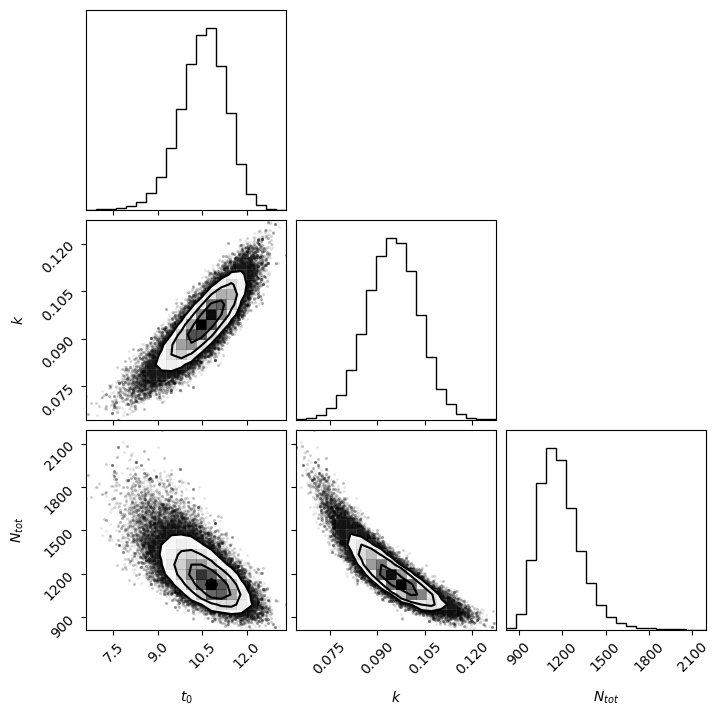

In [41]:
# Grafichiamo le combinazioni di parametri in modo da osservare le loro distribuzioni
# e notare possibili correlazioni fra di essi
fig = corner.corner(flat_samples, labels=labels)

In [42]:
# Troviamo i parametri più affidabili
t_0_best_fit, k_best_fit, N_tot_best_fit = np.percentile(flat_samples, 50, axis=0)
t_0_best_fit, k_best_fit, N_tot_best_fit

(10.58265832183221, 0.09511121816207792, 1170.4343058600534)

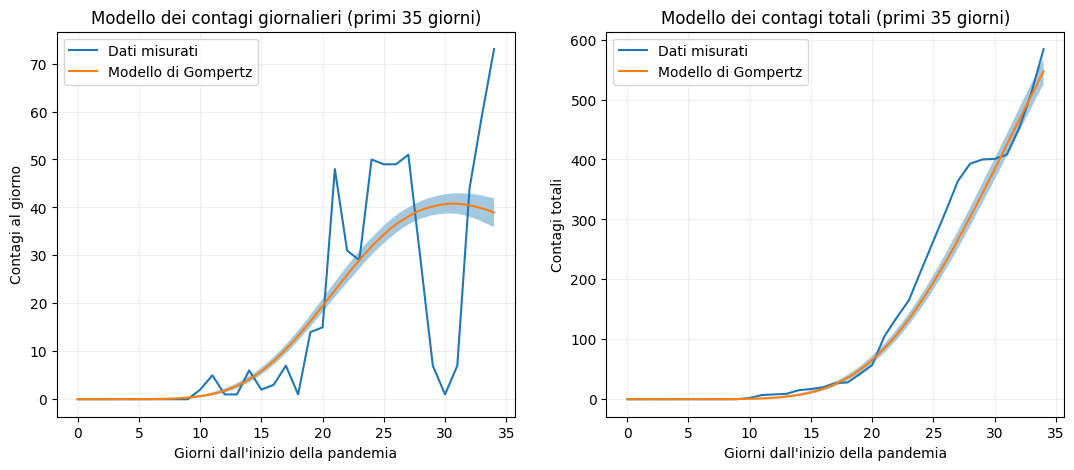

In [43]:
# Ora creiamo un grafico per vedere il risultato del modello in sè.
# Qui usiamo la funzione di Gompertz anziché la logistica
N_samples = 1000
x_arr = np.linspace(0, 34, 2000)
y_arr = np.zeros((2000, N_samples))
for i in range(N_samples):
    idx = np.random.randint(flat_samples.shape[0])
    est_t_0, est_k, est_N_tot = flat_samples[idx, :]
    y_arr[:, i] = contagi_giornalieri(gompertz, x_arr, t_0=est_t_0, k=est_k, N_tot=est_N_tot)

# Prendiamo il modello migliore (50° percentile) e quelli ad una "deviazione standard"
# dal 50° percentile della distribuzione (16° e 84° percentili)
y_arr_best_fit = np.percentile(y_arr, 50, axis=1)
y_arr_lower_estimate = np.percentile(y_arr, 16, axis=1)
y_arr_upper_estimate = np.percentile(y_arr, 84, axis=1)

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

axes[0].plot(np.arange(0, 35), data_aosta_daily_early["nuovi_positivi"], label="Dati misurati")
axes[0].plot(x_arr, y_arr_best_fit, label="Modello di Gompertz")
axes[0].fill_between(x_arr, y_arr_lower_estimate, y_arr_upper_estimate, alpha=0.4)
axes[0].set_title("Modello dei contagi giornalieri (primi 35 giorni)")
axes[0].set_xlabel("Giorni dall'inizio della pandemia")
axes[0].set_ylabel("Contagi al giorno")
axes[0].grid(alpha=0.2)
axes[0].legend()

# e controlliamo anche l'andamento nei casi totali, non solo quelli giornalieri
for i in range(N_samples):
    idx = np.random.randint(flat_samples.shape[0])
    est_t_0, est_k, est_N_tot = flat_samples[idx, :]
    y_arr[:, i] = gompertz(x_arr, t_0=est_t_0, k=est_k, N_tot=est_N_tot)

y_arr_best_fit = np.percentile(y_arr, 50, axis=1)
y_arr_lower_estimate = np.percentile(y_arr, 16, axis=1)
y_arr_upper_estimate = np.percentile(y_arr, 84, axis=1)

axes[1].plot(np.arange(0, 35), data_aosta_daily_early["totale_casi"], label="Dati misurati")
axes[1].plot(x_arr, y_arr_best_fit, label="Modello di Gompertz")
axes[1].fill_between(x_arr, y_arr_lower_estimate, y_arr_upper_estimate, alpha=0.4)
axes[1].set_title("Modello dei contagi totali (primi 35 giorni)")
axes[1].set_xlabel("Giorni dall'inizio della pandemia")
axes[1].set_ylabel("Contagi totali")
axes[1].grid(alpha=0.2)
axes[1].legend()

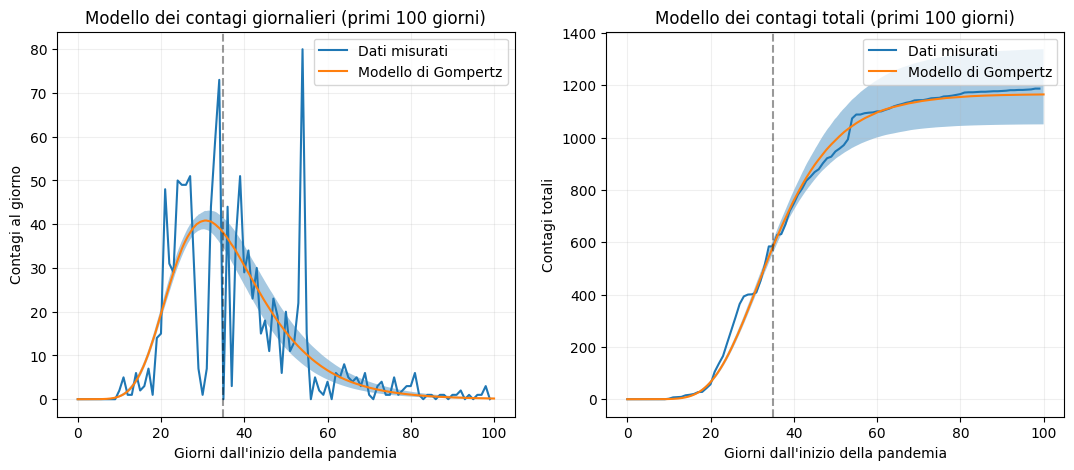

In [44]:
# Vediamo se il modello predice con buona precisione oltre l'intervallo di "addestramento"
x_arr = np.linspace(0, 100, 2000)
y_arr = np.zeros((2000, N_samples))
for i in range(N_samples):
    idx = np.random.randint(flat_samples.shape[0])
    est_t_0, est_k, est_N_tot = flat_samples[idx, :]
    y_arr[:, i] = contagi_giornalieri(gompertz, x_arr, t_0=est_t_0, k=est_k, N_tot=est_N_tot)

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

axes[0].plot(np.arange(0, 100), data_aosta_daily_100["nuovi_positivi"], label="Dati misurati")
axes[0].plot(x_arr, np.percentile(y_arr, 50, axis=1), label="Modello di Gompertz")
axes[0].fill_between(x_arr, np.percentile(y_arr, 16, axis=1), np.percentile(y_arr, 84, axis=1), alpha=0.4)
axes[0].axvline(35, linestyle="--", color="black", alpha=0.4)
axes[0].set_title("Modello dei contagi giornalieri (primi 100 giorni)")
axes[0].set_xlabel("Giorni dall'inizio della pandemia")
axes[0].set_ylabel("Contagi al giorno")
axes[0].grid(alpha=0.2)
axes[0].legend()

# e controlliamo anche l'andamento nei casi totali, non solo quelli giornalieri
for i in range(N_samples):
    idx = np.random.randint(flat_samples.shape[0])
    est_t_0, est_k, est_N_tot = flat_samples[idx, :]
    y_arr[:, i] = gompertz(x_arr, t_0=est_t_0, k=est_k, N_tot=est_N_tot)

y_arr_best_fit = np.percentile(y_arr, 50, axis=1)
y_arr_lower_estimate = np.percentile(y_arr, 16, axis=1)
y_arr_upper_estimate = np.percentile(y_arr, 84, axis=1)

axes[1].plot(np.arange(0, 100), data_aosta_daily_100["totale_casi"], label="Dati misurati")
axes[1].plot(x_arr, y_arr_best_fit, label="Modello di Gompertz")
axes[1].fill_between(x_arr, y_arr_lower_estimate, y_arr_upper_estimate, alpha=0.4)
axes[1].axvline(35, linestyle="--", color="black", alpha=0.4)
axes[1].set_title("Modello dei contagi totali (primi 100 giorni)")
axes[1].set_xlabel("Giorni dall'inizio della pandemia")
axes[1].set_ylabel("Contagi totali")
axes[1].grid(alpha=0.2)
axes[1].legend()

# Parte 4

In [45]:
# Consideriamo il periodo tra il 03/06/2020 e il 03/06/2021
data_aosta_daily_mid = data_aosta_daily[
    (data_aosta_daily.index > Timestamp(year=2020, month=6, day=3))
    & (data_aosta_daily.index < Timestamp(year=2021, month=6, day=3))
]
data_aosta_daily_mid.shape

(365, 29)

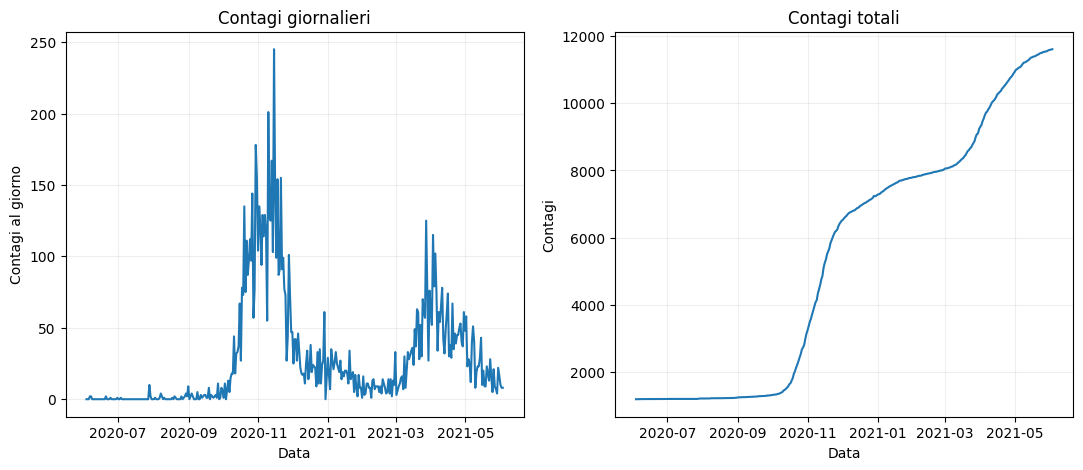

In [46]:
# Diamo un occhio ai dati
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

axes[0].plot(data_aosta_daily_mid["nuovi_positivi"])
axes[0].set_title("Contagi giornalieri")
axes[0].set_xlabel("Data")
axes[0].set_ylabel("Contagi al giorno")
axes[0].grid(alpha=0.2)

axes[1].plot(data_aosta_daily_mid["totale_casi"])
axes[1].set_title("Contagi totali")
axes[1].set_xlabel("Data")
axes[1].set_ylabel("Contagi")
axes[1].grid(alpha=0.2)

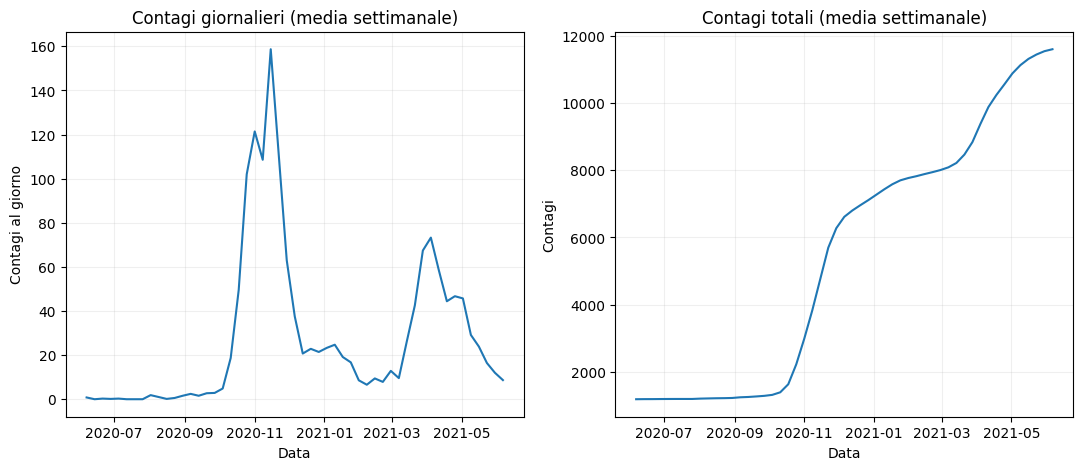

In [47]:
# I dati sono molto rumorosi, quindi usiamo la media settimanale
data_aosta_weekly_mid = data_aosta_daily_mid.resample("W")

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

axes[0].plot(data_aosta_weekly_mid["nuovi_positivi"].mean())
axes[0].set_title("Contagi giornalieri (media settimanale)")
axes[0].set_xlabel("Data")
axes[0].set_ylabel("Contagi al giorno")
axes[0].grid(alpha=0.2)

axes[1].plot(data_aosta_weekly_mid["totale_casi"].mean())
axes[1].set_title("Contagi totali (media settimanale)")
axes[1].set_xlabel("Data")
axes[1].set_ylabel("Contagi")
axes[1].grid(alpha=0.2)